<a href="https://colab.research.google.com/github/acag0212/smart-on-fhir-tutorial/blob/gh-pages/Miniproject4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model

Loading CSV data to my notebook. This is STD data in California

In [20]:
std_california = pd.read_csv('/content/stds-by-disease-county-year-and-sex.csv', header=0)

Display the first 15 rows.

In [21]:
std_california.head(15)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower 95% CI,Upper 95% CI,Annotation Code
0,Chlamydia,California,2001,Female,75941.0,17339700,438.0,434.9,441.1,NaN
1,Chlamydia,California,2001,Male,24885.0,17173042,144.9,143.1,146.7,NaN
2,Chlamydia,California,2001,Total,101590.0,34512742,294.4,292.6,296.2,NaN
3,Chlamydia,California,2002,Female,81583.0,17554666,464.7,461.6,467.9,NaN
4,Chlamydia,California,2002,Male,28521.0,17383624,164.1,162.2,166.0,NaN
5,Chlamydia,California,2002,Total,110759.0,34938290,317.0,315.2,318.9,NaN
6,Chlamydia,California,2003,Female,85153.0,17782868,478.8,475.6,482.1,NaN
7,Chlamydia,California,2003,Male,31007.0,17606060,176.1,174.2,178.1,NaN
8,Chlamydia,California,2003,Total,116385.0,35388928,328.9,327.0,330.8,NaN
9,Chlamydia,California,2004,Female,89438.0,17968347,497.8,494.5,501.0,NaN


Filter data for only Male Cases.

In [22]:
male_groups = std_california[std_california['Sex'] == 'Male']

Filter the data frame for only Santa Clara County

In [23]:
male_groups_santaclara = male_groups[male_groups['County'] == 'Santa Clara']

Filter the data frame for only Chlamydia


In [24]:
male_groups_santaclara_chl = male_groups_santaclara[male_groups_santaclara['Disease']=='Chlamydia']

Plotting male in Santa Clara Chlamydia rate change per year

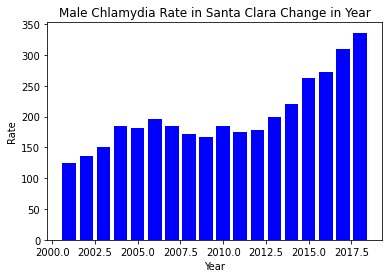

In [25]:
plt.bar(male_groups_santaclara_chl['Year'],male_groups_santaclara_chl['Rate'], color='blue')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Male Chlamydia Rate in Santa Clara Change in Year')
plt.show()

Storing Year Data into chl_X variable with np.array

In [99]:
chl_X = np.array(male_groups_santaclara_chl['Year'])

Reshaping to 2-Dimension data from 1-Dimension

In [101]:
chl_X = chl_X.reshape(-1,1)

Storing Rate Data into chl_Y variable with np.array

In [102]:
chl_Y = np.array(male_groups_santaclara_chl['Rate'])

Reshaping to 2-Dimension data from 1-Dimension

In [104]:
chl_Y = chl_Y.reshape(-1,1)

Separating train data and test data

In [140]:
chl_X_train = chl_X[:-9]
chl_X_test = chl_X[-9:]

In [141]:
print(chl_X_train)

[[2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]]


Separating train data and test data

In [142]:
chl_Y_train = chl_Y[:-9]
chl_Y_test = chl_Y[-9:]

In [167]:
print(chl_Y_test)

[[184.9]
 [174.2]
 [177.5]
 [199.4]
 [219.8]
 [262.3]
 [272.5]
 [309.5]
 [336.1]]


making regression model with linearregression

In [168]:
regr = linear_model.LinearRegression()

Fitting the regression data with recent 9 years data

In [169]:
regr.fit(chl_X_test, chl_Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Making prediction using the testing set

In [174]:
chl_Y_pred = regr.predict(chl_X_test)

The coefficients print

In [171]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[21.06]]


The mean squared error

In [172]:
print('Mean squared error: %.2f'
        % mean_squared_error(chl_Y_test, chl_Y_pred))

Mean squared error: 252.55


The coefficient of determination: 1 is perfect prediction

In [173]:
print('Coefficient of determination: %.2f'
      % r2_score(chl_Y_test, chl_Y_pred))

Coefficient of determination: 0.92


Plot Outputs

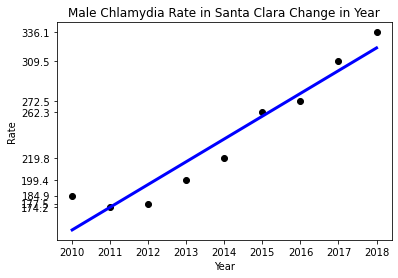

In [179]:
plt.scatter(chl_X_test, chl_Y_test, color='black')
plt.plot(chl_X_test, chl_Y_pred, color='blue', linewidth=3)

plt.xticks((chl_X_test))
plt.yticks((chl_Y_test))
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Male Chlamydia Rate in Santa Clara Change in Year')

plt.show()